# Ujian Akhir Semester Machine Learning
* Nama : Muhammad Abyan Thorif
* NIM : 202131104
* Kelas : A

# Mengimport Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Membaca Dataset

Dataset : https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci

In [2]:
df = pd.read_csv('online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
print(df)

        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                 InvoiceDate  Price  Customer ID         Country  
0        2009-12-01 

# Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
label_encoder = LabelEncoder()
df['Invoice'] = label_encoder.fit_transform(df['Invoice'])
df['StockCode'] = label_encoder.fit_transform(df['StockCode'])
df['Description'] = label_encoder.fit_transform(df['Description'])
df['InvoiceDate'] = label_encoder.fit_transform(df['InvoiceDate'])
df['Country'] = label_encoder.fit_transform(df['Country'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  int32  
 1   StockCode    1067371 non-null  int32  
 2   Description  1067371 non-null  int32  
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  int32  
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  int32  
dtypes: float64(2), int32(5), int64(1)
memory usage: 44.8 MB


# Feature Selection and Target Variable

In [7]:
X = df[['Invoice', 'StockCode', 'Price', 'Customer ID']]
y = df['Description']

# Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [9]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

# Model Evaluation

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
accuracy = classifier.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 71.52%


# Visualisasi Data Pelanggan

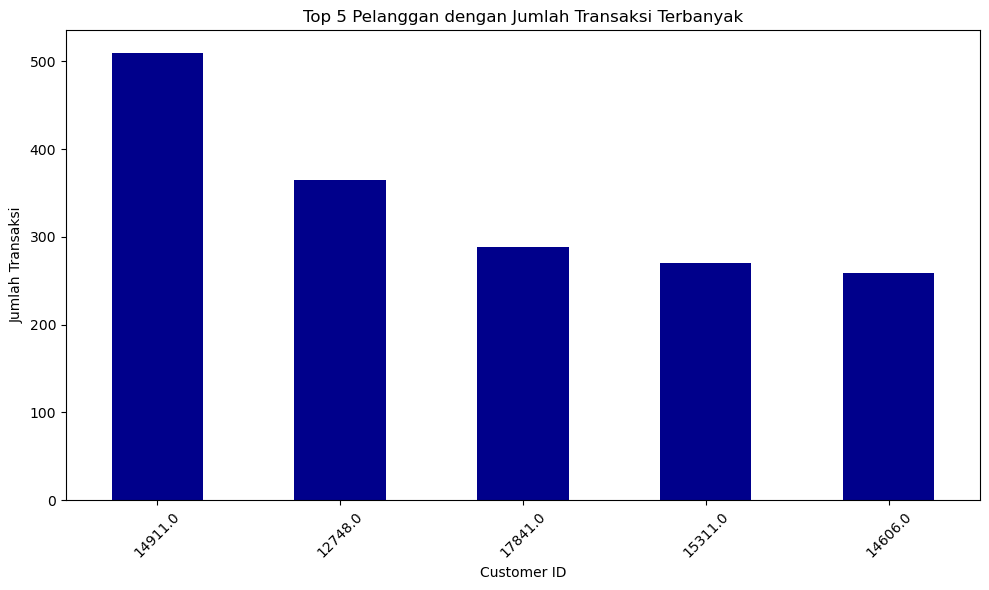

In [12]:
transactions_per_customer = df.groupby('Customer ID')['Invoice'].nunique().sort_values(ascending=False)

top_customers = transactions_per_customer.head(5)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='darkblue')
plt.xlabel('Customer ID')
plt.ylabel('Jumlah Transaksi')
plt.title('Top 5 Pelanggan dengan Jumlah Transaksi Terbanyak')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

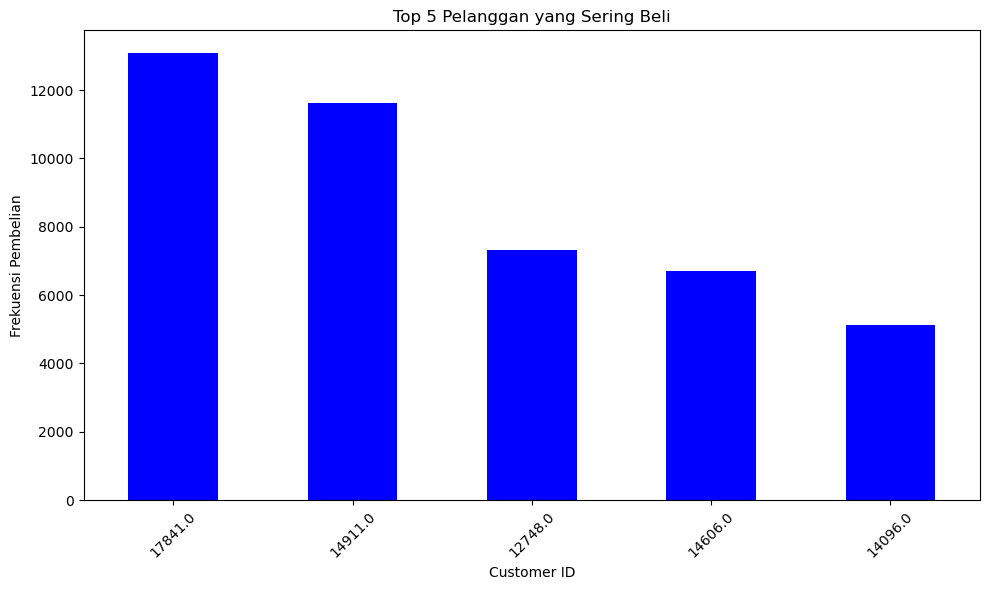

In [13]:
customer_purchase_frequency = df['Customer ID'].value_counts()

top_customers = customer_purchase_frequency.head(5)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='blue')
plt.xlabel('Customer ID')
plt.ylabel('Frekuensi Pembelian')
plt.title('Top 5 Pelanggan yang Sering Beli')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Produk Terlaris

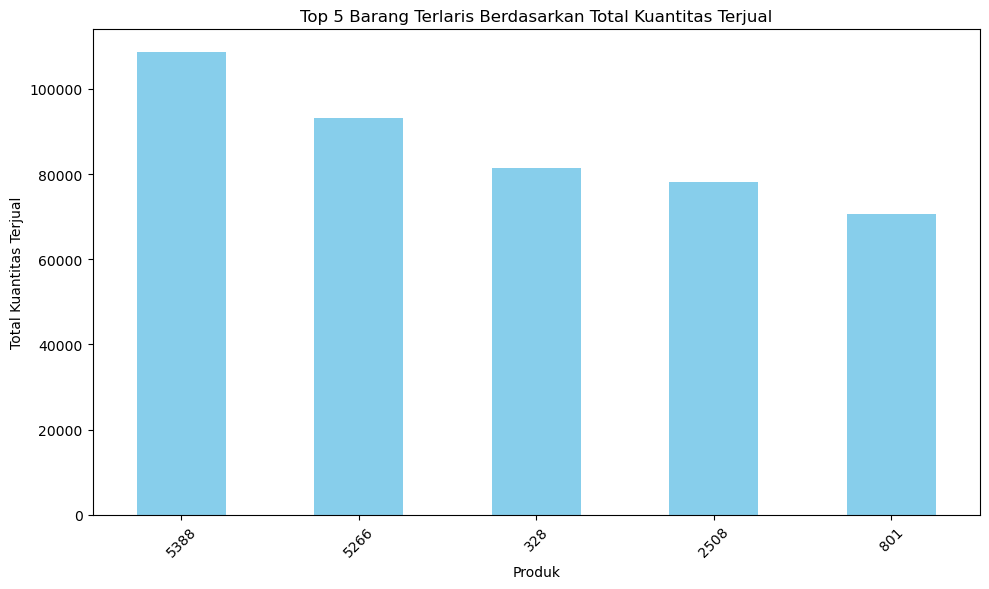

In [14]:
bestsellers = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

top_bestsellers = bestsellers.head(5)

plt.figure(figsize=(10, 6))
top_bestsellers.plot(kind='bar', color='skyblue')
plt.xlabel('Produk')
plt.ylabel('Total Kuantitas Terjual')
plt.title('Top 5 Barang Terlaris Berdasarkan Total Kuantitas Terjual')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()